In [1]:
from diffusers import StableDiffusionPipeline


In [2]:
pipeline = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base").to("cuda")


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

c:\Users\lucasmeyer\personal\diffusers\.venv\lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [3]:
style = """illustration, high detail, realistic shaded lighting by ilya kuvshinov and michael garmash and rob rey, 
iamag premiere, wlop matte print, 4k resolution, a masterpiece"""

prompt1 = "blue Twitter bird on fence"

prompt2 = "standard schnauzer dog, running on spaceship, gray fur, wearing jedi hood, holding lightsaber in mouth"

prompt3 = "disney librarian being hit by lightning, brown hair, grey eyes, cute face, wearing black turtleneck, behind desk"

In [4]:

negative_prompt1 = """
ugly, tiling, poorly drawn hands, poorly drawn paws, poorly drawn feet, poorly drawn face, out of frame, extra limbs
"""

In [5]:
prompt = f"{prompt3}, {style}"
negative_prompt = negative_prompt1

In [6]:

image = pipeline(prompt=prompt, negative_prompt=negative_prompt, height=512, width=512, num_inference_steps=80, guidance_scale=7.5).images[0]


  0%|          | 0/80 [00:00<?, ?it/s]

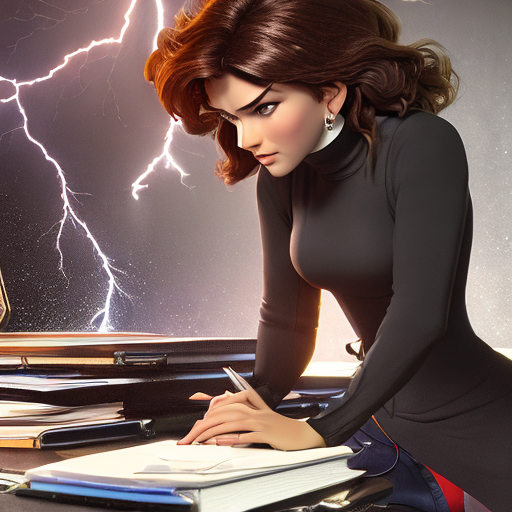

In [7]:
image

In [8]:
image.save("local_data/shocking_experiment.png")